## **TRABALHO 2 DE PROCESSAMENTO DIGITAL DE SINAIS**
Alunos: 
            Keli Tauana Prass Ruppenthal,
            Moisés Goulart de Oliveira,
            Victor Dallagnol Bento e
            Yuri Oliveira

### **Métodos utilizados:**
*   **numpy:** para gerar o audio.
*   **IPython.display:** para trocar o audio.
*   **scipy.signal:** para carregar filtros e funções.
*   **matplotlib.pyplot:** para plotar.
*   **librosa:** Auxilia na visualização do áudio.


In [1]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
!pip install librosa
import librosa
import librosa.display

%matplotlib inline

    100% |████████████████████████████████| 1.6MB 13.8MB/s 
    100% |████████████████████████████████| 327kB 25.2MB/s 
    100% |████████████████████████████████| 3.2MB 9.0MB/s 
    100% |████████████████████████████████| 16.1MB 2.1MB/s 
  Running setup.py bdist_wheel for librosa ... - \ done
  Stored in directory: /root/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread ... - done
  Stored in directory: /root/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


Função *OverLap-Save*.

In [0]:
def overlapsave (x, h):
    L = len(x)  # length of input signal
    N = len(h)  # length of impulse response
                #P length of segments
    P = len(h)+1
    # overlap-save convolution
    nseg = (L+N-1)//(P-N+1) + 1
    x = np.concatenate((np.zeros(N-1), x, np.zeros(P)))
    xp = np.zeros((nseg, P))
    yp = np.zeros((nseg, P))
    y = np.zeros(nseg*(P-N+1))
    print(str(nseg) + ' blocos')
    for p in range(nseg):
        xp[p, :] = x[p*(P-N+1):p*(P-N+1)+P]
        yp[p, :] = np.fft.irfft(np.fft.rfft(xp[p, :]) * np.fft.rfft(h, P))
        y[p*(P-N+1):p*(P-N+1)+P-N+1] = yp[p, N-1:]
    y = y[0:N+L]
    return y


O *LibROSA* é um pacote python para análise de música e áudio. Ele fornece os blocos de construção necessários para criar sistemas de recuperação de informações musicais.

In [3]:
!wget https://raw.githubusercontent.com/da3mons/Python/master/strokes.wav
x, sr = librosa.load('strokes.wav', sr=44100) 
print(x.shape, sr)

--2018-12-10 14:53:09--  https://raw.githubusercontent.com/da3mons/Python/master/strokes.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2548816 (2.4M) [audio/wav]
Saving to: ‘strokes.wav’

strokes.wav         100%[===================>]   2.43M  --.-KB/s    in 0.06s   

2018-12-10 14:53:10 (39.8 MB/s) - ‘strokes.wav’ saved [2548816/2548816]

(1274185,) 44100


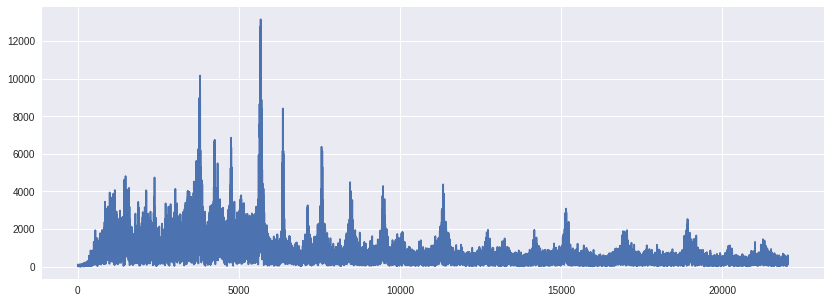

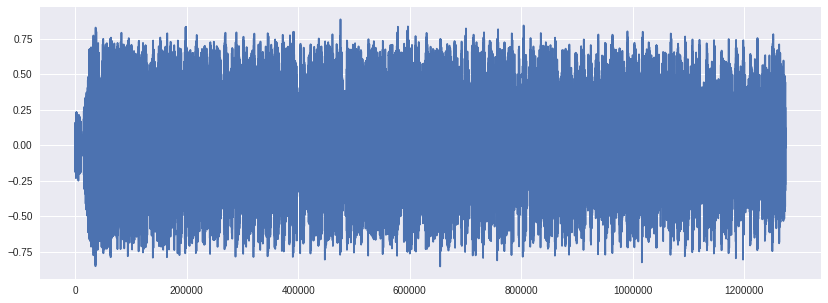

In [4]:
# plota amostra do sinal de entrada
fftSig = abs(np.fft.rfft(x))
plt.figure(figsize=(14, 5))
plt.plot(fftSig[:sr//2]) #até 20k que é onde ouvimos
plt.show()

plt.figure(figsize=(14, 5))
plt.plot((x)) #grafico da entrada


In [5]:
maxFreq = np.argmax(fftSig)
print(maxFreq)

5676


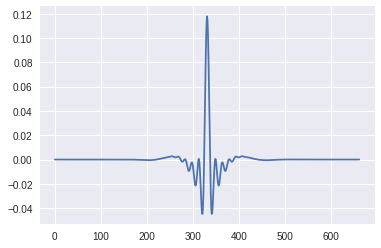

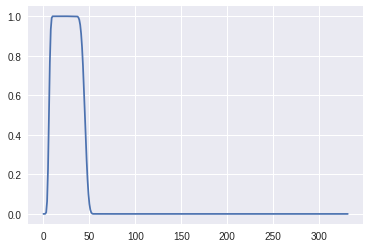

In [6]:
# Filtro passa faixa


# Configuration.
fS = 44100  # Sampling rate.
fL = 400  # Cutoff frequency.
fH = 3000  # Cutoff frequency.
NL = 461  # Filter length for roll-off at fL, must be odd.
NH = 203  # Filter length for roll-off at fH, must be odd.

# Compute a low-pass filter with cutoff frequency fH.
hlpf = np.sinc(2 * fH / fS * (np.arange(NH) - (NH - 1) / 2.))
hlpf *= np.blackman(NH)
hlpf /= np.sum(hlpf)

# Compute a high-pass filter with cutoff frequency fL.
hhpf = np.sinc(2 * fL / fS * (np.arange(NL) - (NL - 1) / 2.))
hhpf *= np.blackman(NL)
hhpf /= np.sum(hhpf)
hhpf = -hhpf
hhpf[(NL - 1) // 2] += 1

# Convolve both filters.
h = np.convolve(hlpf, hhpf)


plt.plot(h)
plt.show()
plt.plot(abs(np.fft.rfft(h)))

637424 blocos


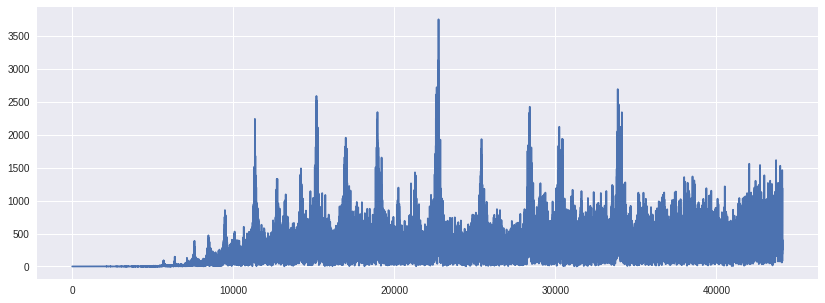

In [7]:
Y = overlapsave(x,h)
# Y = np.convolve(x,h)
plt.figure(figsize=(14, 5))
plt.plot(abs(np.fft.rfft(Y))[:sr]) # sinal de saída filtrado

Verificação do audio final.

In [8]:
# entrada 
ipd.Audio(x, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# saida
ipd.Audio(Y, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


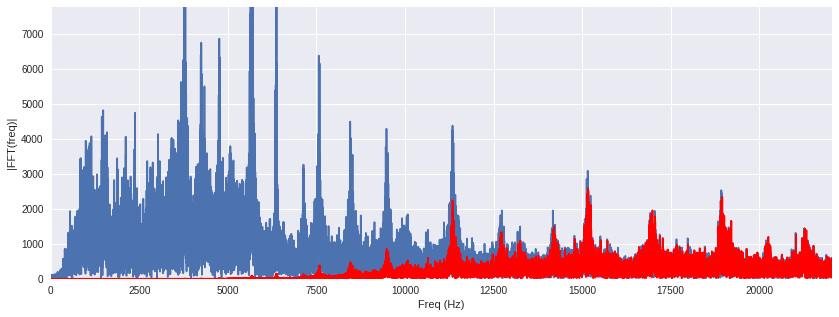

In [10]:
fft_x = np.fft.rfft(x)
fft_y = np.fft.rfft(Y)
plt.figure(figsize=(14, 5))

plt.plot(abs(fft_x))
plt.hot()
plt.plot(abs(fft_y), 'r-')
plt.xlim((0, sr//2))
plt.ylim((0, fft_x.max()))
plt.xlabel("Freq (Hz)")
plt.ylabel("|FFT(freq)|");

A escala em db ajuda a entender o funcionamento do filtro

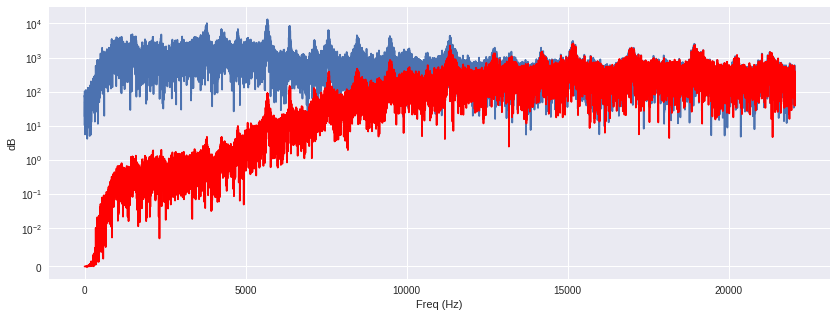

In [11]:
plt.figure(figsize=(14, 5))
plt.plot(abs(fft_x[:sr//2]))
plt.plot(abs(fft_y[:sr//2]), 'r-')
plt.yscale('symlog', linthreshy=0.01)
plt.xlabel("Freq (Hz)")
plt.ylabel("dB");

In [12]:
!wget https://raw.githubusercontent.com/da3mons/Python/master/birdssnr10.wav
x, sr = librosa.load('birdssnr10.wav', sr=16000) # SNR = -10dB
print(x.shape, sr)

--2018-12-10 14:57:02--  https://raw.githubusercontent.com/da3mons/Python/master/birdssnr10.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 412314 (403K) [audio/wav]
Saving to: ‘birdssnr10.wav’

birdssnr10.wav      100%[===================>] 402.65K  --.-KB/s    in 0.04s   

2018-12-10 14:57:03 (10.8 MB/s) - ‘birdssnr10.wav’ saved [412314/412314]

(206135,) 16000


In [0]:
# low pass
# Configuration.
fS = 16000  # Sampling rate.
fL = 2500  # Cutoff frequency.
N = 149  # Filter length, must be odd.

# Compute sinc filter.
h = np.sinc(2 * fL / fS * (np.arange(N) - (N - 1) / 2.))

# Apply window.
h *= np.blackman(N)

# Normalize to get unity gain.
h /= np.sum(h)


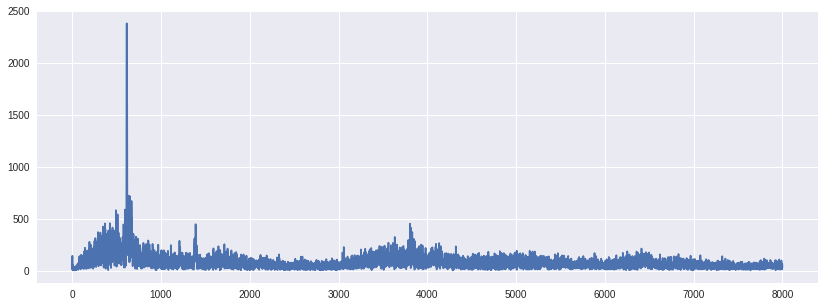

In [14]:
Y = np.convolve(x,h)
plt.figure(figsize=(14, 5))
plt.plot(abs(np.fft.rfft(Y))[:sr//2]) # sinal de saída filtrado

In [15]:
ipd.Audio(x, rate=sr)

In [16]:
ipd.Audio(Y, rate=sr)

In [0]:
# hi-pass
# Configuration.
fS = 16000  # Sampling rate.
fH = 400  # Cutoff frequency.
N = 295  # Filter length, must be odd.

# Compute sinc filter.
h = np.sinc(2 * fH / fS * (np.arange(N) - (N - 1) / 2.))

# Apply window.
h *= np.blackman(N)

# Normalize to get unity gain.
h /= np.sum(h)

# Create a high-pass filter from the low-pass filter through spectral inversion.
h = -h
h[(N - 1) // 2] += 1


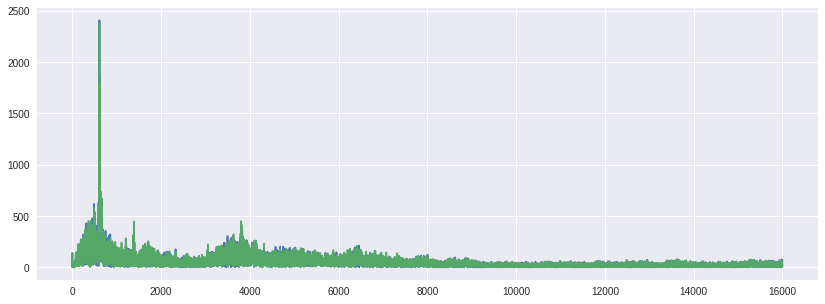

In [18]:
Y2 = np.convolve(Y,h)
plt.figure(figsize=(14, 5))
plt.plot(abs(np.fft.rfft(x))[:sr]) 
plt.plot(abs(np.fft.rfft(Y))[:sr]) # sinal de saída filtrado

In [19]:
ipd.Audio(Y2, rate=sr)

**Referencias**
* https://fiiir.com/
* http://www.numpy.org/
* https://librosa.github.io/librosa/
* https://musicinformationretrieval.com/ipython_audio.html
* https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/nonrecursive_filters/segmented_convolution.html